In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# CARGA DE DATASET SYNERGY

In [2]:
# Cargamos el archivo CSV con pandas
synergy_dataset = pd.read_csv("synergy_logistics_database.csv")

# Declaramos una nueva columna llamada ruta en Bease al origen y destino 
# para facilitar el primer análisis
synergy_dataset['ruta'] = synergy_dataset['origin'] + ' - ' + synergy_dataset['destination']

# Se muestra el dataset para verificar su estructura 
synergy_dataset

,register_id,direction,origin,destination,year,date,product,transport_mode,company_name,total_value,ruta
0,1,Exports,Japan,China,2015,31/01/15,Cars,Sea,Honda,33000000,Japan - China
1,2,Exports,Japan,China,2015,01/02/15,Cars,Sea,Honda,16000000,Japan - China
2,3,Exports,Japan,China,2015,02/02/15,Cars,Sea,Honda,29000000,Japan - China
3,4,Exports,Japan,China,2015,03/02/15,Cars,Sea,Honda,14000000,Japan - China
4,5,Exports,Japan,China,2015,04/02/15,Cars,Sea,Honda,17000000,Japan - China
...,...,...,...,...,...,...,...,...,...,...,...
19051,19052,Imports,Japan,Singapore,2020,27/06/20,Gas turbines,Sea,Union Energy Co,1000000,Japan - Singapore
19052,19053,Imports,Malaysia,Singapore,2020,28/06/20,Gas turbines,Sea,Union Energy Co,2000000,Malaysia - Singapore
19053,19054,Imports,Malaysia,Singapore,2020,29/06/20,Gas turbines,Sea,Union Energy Co,33000000,Malaysia - Singapore
19054,19055,Imports,Malaysia,Singapore,2020,30/06/20,Gas turbines,Sea,Union Energy Co,13000000,Malaysia - Singapore


# 1) Rutas de importación y exportación.

<ipython-input-3-7a2574ccabae>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-3-7a2574ccabae>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


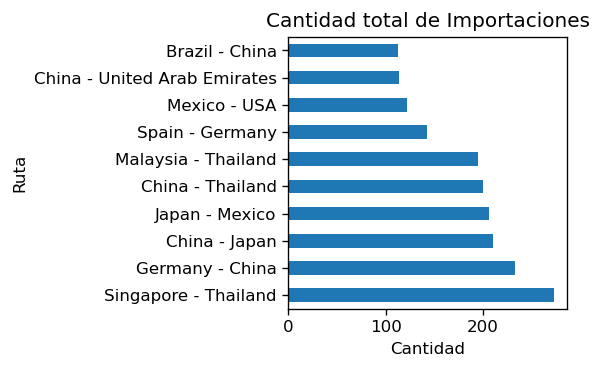

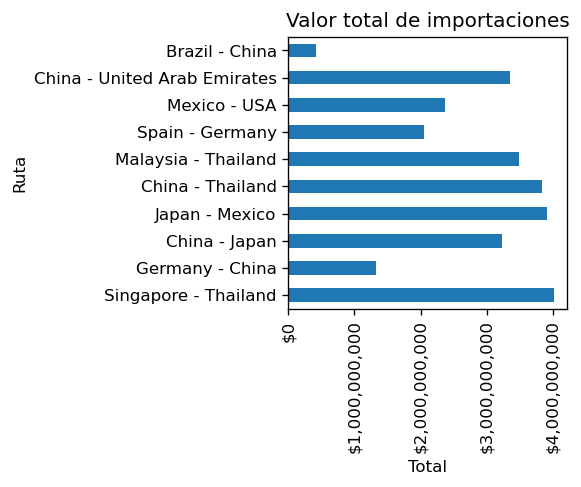

In [3]:
# Rutas mas demandadas en importaciones 
imports = synergy_dataset.loc[ synergy_dataset['direction'] == "Imports"]

first_analysis = imports.groupby(by='ruta').agg({'ruta': ['count'],
                                                 'total_value': ['sum']})

first_analysis = first_analysis.sort_values(by=('ruta','count'), ascending=False)


# Grafica de las rutas más demandadas y su correspondiente cantidad de importaciones
fig, ax = plt.subplots(figsize=(3,3), dpi=120, facecolor='w', edgecolor='k')
first_analysis[('ruta','count')][0:10].plot.barh(ax=ax)
plt.title('Cantidad total de Importaciones')
plt.ylabel('Ruta')
plt.xlabel('Cantidad')
fig.show()

# Gráfica de las rutas más demandadas y su correspondiente valor total 
fig, ax = plt.subplots(figsize=(3,3), dpi=120, facecolor='w', edgecolor='k')
first_analysis[('total_value', 'sum')][0:10].plot.barh(ax=ax)
ax.xaxis.set_major_formatter( mtick.StrMethodFormatter( '${x:,.0f}' ) )
plt.title('Valor total de importaciones')
plt.ylabel('Ruta')
plt.xlabel('Total')
plt.xticks(rotation=90)
fig.show()


<ipython-input-4-3d861832d27c>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-4-3d861832d27c>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


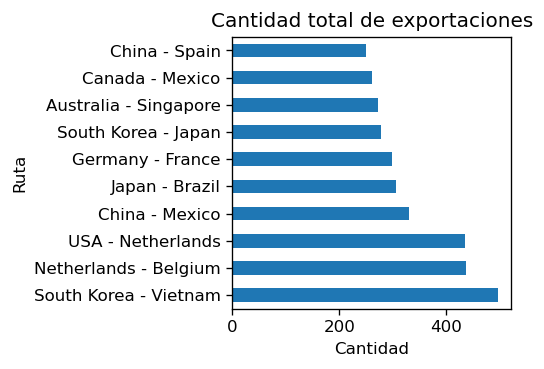

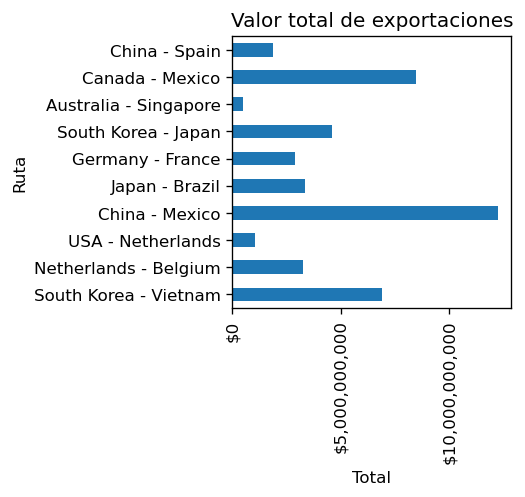

In [4]:
# Rutas mas demandadas en exportaciones 
exports = synergy_dataset.loc[ synergy_dataset['direction'] == "Exports"]

first_analysis = exports.groupby(by='ruta').agg({'ruta': ['count'],
                                                 'total_value': ['sum']})

first_analysis = first_analysis.sort_values(by=('ruta','count'), ascending=False)


# Grafica de las rutas más demandadas y su correspondiente cantidad de exportaciones
fig, ax = plt.subplots(figsize=(3,3), dpi=120, facecolor='w', edgecolor='k')
first_analysis[('ruta','count')][0:10].plot.barh(ax=ax)
plt.title('Cantidad total de exportaciones')
plt.ylabel('Ruta')
plt.xlabel('Cantidad')
fig.show()

# Gráfica de las rutas más demandadas y su correspondiente valor total 
fig, ax = plt.subplots(figsize=(3,3), dpi=120, facecolor='w', edgecolor='k')
first_analysis[('total_value', 'sum')][0:10].plot.barh(ax=ax)
ax.xaxis.set_major_formatter( mtick.StrMethodFormatter( '${x:,.0f}' ) )
plt.title('Valor total de exportaciones')
plt.ylabel('Ruta')
plt.xlabel('Total')
plt.xticks(rotation=90)
fig.show()

# 2) Medio de transporte utilizado

<ipython-input-5-aefd7f01ce09>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-5-aefd7f01ce09>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


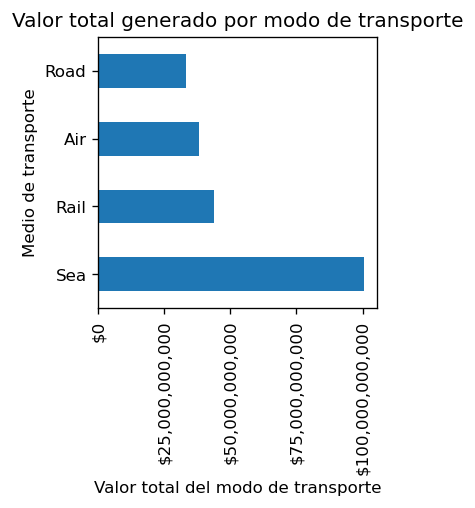

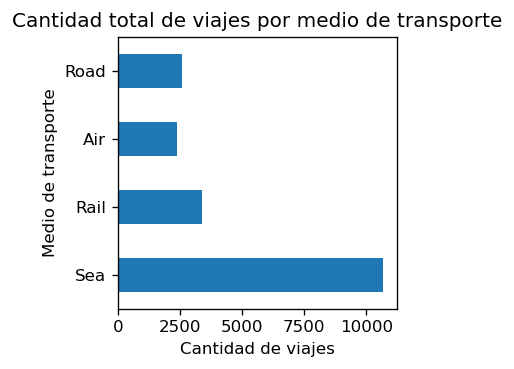

In [5]:
# Medios de transporte más utilizados 
second_analysis = synergy_dataset.groupby(by='transport_mode').agg({'transport_mode': ['count'],
                                                                    'total_value': ['sum']})
second_analysis = second_analysis.sort_values(by=('total_value', 'sum'), ascending=False)

# Reordenando dataframe resultante a partir del valor generado 
second_analysis = second_analysis.sort_values(by=('total_value', 'sum'), ascending=False)

# Gráfica de transportes más importante a partir del valor de sus importaciones y exportaciones
fig, ax = plt.subplots(figsize=(3,3), dpi=120, facecolor='w', edgecolor='k')
second_analysis[('total_value', 'sum')][0:10].plot.barh(ax=ax)
ax.xaxis.set_major_formatter( mtick.StrMethodFormatter( '${x:,.0f}' ) )
plt.title('Valor total generado por modo de transporte')
plt.ylabel('Medio de transporte')
plt.xlabel('Valor total del modo de transporte')
plt.xticks(rotation=90)
fig.show()

# Grafica de medios de transporte más utilizados a partir de los viajes realizados
fig, ax = plt.subplots(figsize=(3,3), dpi=120, facecolor='w', edgecolor='k')
second_analysis[('transport_mode','count')][0:10].plot.barh(ax=ax)
plt.title('Cantidad total de viajes por medio de transporte')
plt.ylabel('Medio de transporte')
plt.xlabel('Cantidad de viajes')
fig.show()


# 3) Valor total de importaciones y exportaciones.

<ipython-input-6-41f6ee6f55ba>:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


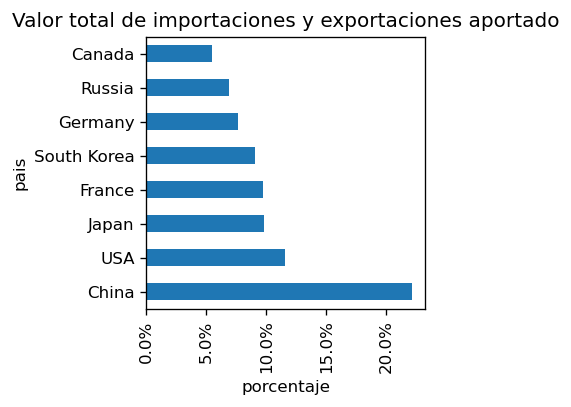

In [6]:

# Se obtiene el valor total de las importaciones y exportaciones por país
# en dataframes separados
third_analysis_imports = imports.groupby(by='origin').agg({'total_value': ['sum']})
third_analysis_exports = exports.groupby(by='origin').agg({'total_value': ['sum']})

# Se renombran las columbas de ambos dataframes para unirlos de manera más sencilla
third_analysis_imports.columns = third_analysis_imports.columns.map('_'.join)
third_analysis_exports.columns = third_analysis_exports.columns.map('_'.join)

third_analysis_imports = third_analysis_imports.rename(columns={"total_value_sum": "total_value_imports"})
third_analysis_exports = third_analysis_exports.rename(columns={"total_value_sum": "total_value_exports"})

# Se unen ambos dataframes en uno solo y se rellenan los valores nulos a 0
third_analysis_general = third_analysis_imports.join(third_analysis_exports)
third_analysis_general = third_analysis_general.fillna(0)

# Se realiza la suma del total de importaciones y exportaciones por país
third_analysis_general['total_value'] = third_analysis_general['total_value_imports'] + third_analysis_general['total_value_exports']

# Se calcula el porcentaje de valor aportado por cada país 
third_analysis_general['percent'] = (third_analysis_general['total_value'] / 
                                     third_analysis_general['total_value'].sum()) * 100

# Reordenando dataframe resultante a partir del porcentage aportado
third_analysis_general = third_analysis_general.sort_values(by='percent', ascending=False)

# Obteniendo aquellos países que representan el 80% del valor total de las imporacioones
# y exportaciones
filtered_countries = third_analysis_general['percent'].cumsum().lt(83.0)
third_analysis_general = third_analysis_general[filtered_countries]

# Grafica de medios de transporte más utilizados a partir de los viajes realizados
fig, ax = plt.subplots(figsize=(3,3), dpi=120, facecolor='w', edgecolor='k')
third_analysis_general['percent'].plot.barh(ax=ax)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Valor total de importaciones y exportaciones aportado')
plt.ylabel('pais')
plt.xlabel('porcentaje')
plt.xticks(rotation=90)
fig.show()
